In [113]:
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame, HTML
import scipy.constants as const
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#from negotovost import Negotovost

In [140]:
def draw_reze(arr):


    def format_reza(i):
        if i == 1:
            return 'reža'
        elif i == 2:
            return 'reži'
        elif i == 3 :
            return 'reže'
        else:
            return 'rež'


    for i in arr:

        rez1 = pd.read_csv(f'./meritve/Fraunhofer/{i}rez.dat',comment="#",names=['X','U'],sep=' ')

        plt.plot(rez1['X'],rez1['U'],label=f'{i} {format_reza(i)}')

    plt.title('Relativna amplituda napetosti na senzorju v odvisnosti od razdalje')

    plt.xlabel('x [mm]')
    plt.ylabel('$U_{senzor}/U_{max}$')

    name = '_'.join([str(x) for x in arr])



    plt.legend()
    plt.grid()
    plt.savefig(f'./grafi/{name}_reze.jpg',dpi=200,bbox_inches='tight')
    plt.show()

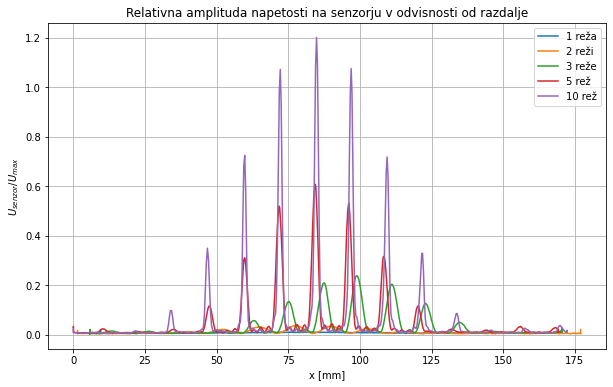

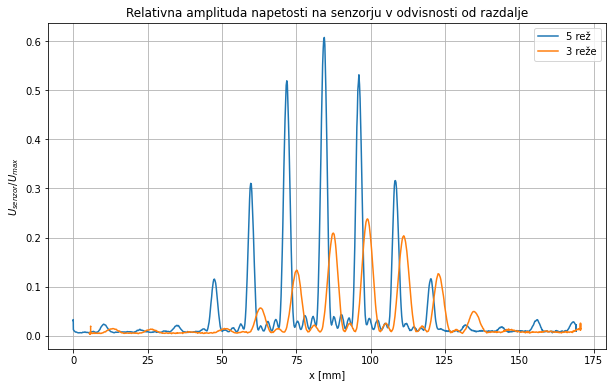

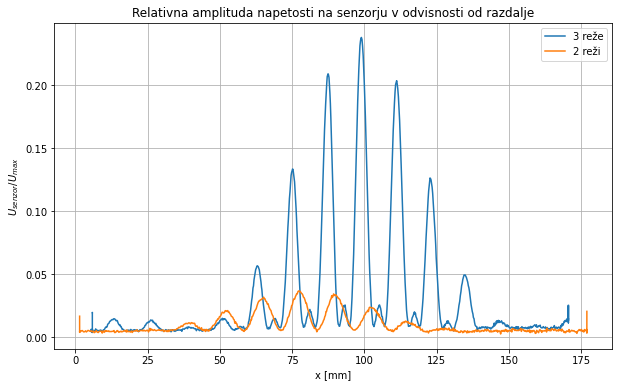

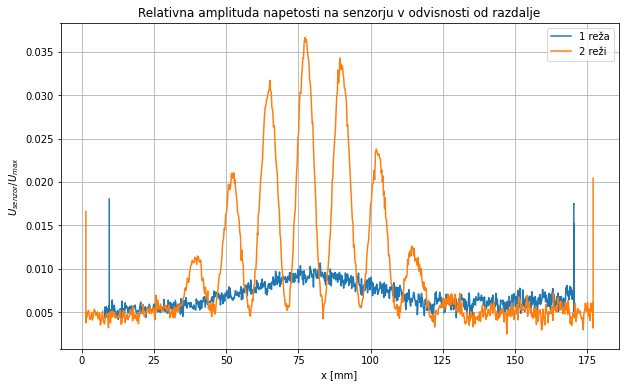

In [141]:
draw_reze([1,2,3,5,10])
draw_reze([5,3])
draw_reze([3,2])
draw_reze([1,2])

In [116]:
fajli = [1,2,3,5,10]
maksimumi = []

for i in fajli:
    rez = pd.read_csv(f'./meritve/Fraunhofer/{i}rez.dat',comment="#",names=['X','U'],sep=' ')
    maksimumi.append(max(rez['U']))

maksimumi = np.array(maksimumi)/maksimumi[0]

In [117]:
obj = {
    '$N$': np.array(fajli),
    '$N^2$': (np.array(fajli))**2,
    'Meritve': maksimumi
}

print(pd.DataFrame(obj).to_latex(escape=False,caption='Primerjava meritev uklonskega maksimuma z teoretično',index=False,float_format="%.0f"))

\begin{table}
\centering
\caption{Primerjava meritev uklonskega maksimuma z teoretično}
\begin{tabular}{rrr}
\toprule
 $N$ &  $N^2$ &  Meritve \\
\midrule
   1 &      1 &        1 \\
   2 &      4 &        2 \\
   3 &      9 &       13 \\
   5 &     25 &       34 \\
  10 &    100 &       67 \\
\bottomrule
\end{tabular}
\end{table}



In [136]:
def find_min_max(df,x_min,x_max):
    df = df[df.X < x_max]
    df = df[df.X > x_min]
    f_max = df.loc[df.U == df.U.max()]['X']
    f_min = df.loc[df.U == df.U.min()]['X']
    return f_max.iloc[0],f_min.iloc[0]

In [221]:
fajli = [1,2,3,5,10]
obmocja = [
    [15,100],
    [75,90],
    [90,110],
    [83,87],
    [84,87.4]
]

max_mins = []

for ind,i in enumerate(fajli):
    rez = pd.read_csv(f'./meritve/Fraunhofer/{i}rez.dat',comment="#",names=['X','U'],sep=' ')

    minimum,maksimum = find_min_max(rez,obmocja[ind][0],obmocja[ind][1])

    max_mins.append([np.abs(-minimum+maksimum),minimum,maksimum])

max_mins = np.array(max_mins)
minimumi_maksimumi = pd.DataFrame(max_mins,columns=['min-max [mm]','max [mm]','prvi min [mm]'])

minimumi_maksimumi['N'] = fajli
minimumi_maksimumi

,min-max [mm],max [mm],prvi min [mm],N
0,60.317435,82.550098,22.232663,1
1,6.311003,77.222087,83.533090,2
2,4.342340,98.961283,103.303623,3
3,2.434339,84.434885,86.869224,5
4,2.247075,84.851192,87.098267,10


In [222]:
lambda_val = 633e-6

fi = np.arctan(2.434339	/(2000-85))
N = 5

d = lambda_val/N/fi

minimumi_maksimumi['d [$\mu$m]'] = lambda_val/minimumi_maksimumi['N']/np.arctan(minimumi_maksimumi['min-max [mm]']/(2000-85))*1000

minimumi_maksimumi

print(minimumi_maksimumi.to_latex(escape=False,caption='Minimumi, maksimumi in d',index=False,float_format="%.0f"))

\begin{table}
\centering
\caption{Minimumi, maksimumi in d}
\begin{tabular}{rrrrr}
\toprule
 min-max [mm] &  max [mm] &  prvi min [mm] &  N &  d [$\mu$m] \\
\midrule
           60 &        83 &             22 &  1 &          20 \\
            6 &        77 &             84 &  2 &          96 \\
            4 &        99 &            103 &  3 &          93 \\
            2 &        84 &             87 &  5 &         100 \\
            2 &        85 &             87 & 10 &          54 \\
\bottomrule
\end{tabular}
\end{table}



In [259]:
obmocja = [

    [80,90],
    [90,100],

]

max_mins = []


rez = pd.read_csv(f'./meritve/Fraunhofer/{5}rez.dat',comment="#",names=['X','U'],sep=' ')

minimum,maksimum = find_min_max(rez,obmocja[0][0],obmocja[0][1])
minimum1,maksimum1 = find_min_max(rez,obmocja[1][0],obmocja[1][1])


print(maksimum,maksimum1,maksimum-maksimum1)

lambda_val/np.arctan((maksimum/)/(2000-85))*1000

88.9358797130395 91.5248362835595 -2.588956570519997


40.893231093798896

# Fresnel

In [124]:
fresnel = pd.read_excel('./meritve/Fresnel/MeritveFresnel.ods',usecols="A:C",skiprows=12)

In [25]:
fresnel['del_n'] = np.arange(len(fresnel)-1,-1,-1)
fresnel

,Stanje sredinske točke,Z[mm],dZ [mm],del_n
0,Temno,134,1,6
1,Svetlo,115,1,5
2,Temno,102,1,4
3,Svetlo,93,1,3
4,Temno,85,1,2
5,Svetlo,80,1,1
6,Temno,75,1,0


In [41]:
def lin_fit(x,a,b):
    return x*a + b

In [90]:
x = 1/(fresnel['Z[mm]']+19-55)
y = fresnel['del_n']

print(len(y))

params = curve_fit(lin_fit, x, y)
a,b = params[0]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
#print(a)
k = a,errs[0]
print(k,b,'+-',errs[1])

7
(-390.1961814082022, 4.753333321550132) 9.93067270781171 +- 0.08787137438484438


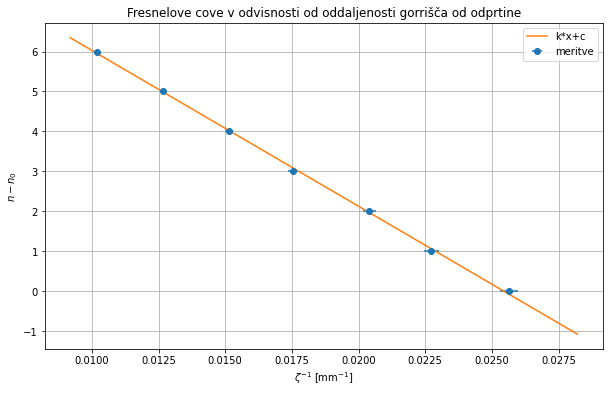

In [93]:
x_theoretical = np.linspace(min(x)*0.9,max(x)*1.1)
y_theoretical = lin_fit(x_theoretical,a,b)

plt.errorbar(x, y,xerr=x*fresnel['dZ [mm]']/fresnel['Z[mm]'],fmt='o',label='meritve')
plt.plot(x_theoretical, y_theoretical,label='k*x+c')

plt.title(r'')
plt.ylabel(r'$n - n_0$')
plt.xlabel(r'$\zeta^{-1}$ [mm$^{-1}$]')

plt.title('Fresnelove cone v odvisnosti od oddaljenosti gorrišča od odprtine')

plt.grid()
plt.legend()
plt.savefig('./grafi/fresnel.jpg',dpi=200,bbox_inches='tight')
plt.show()

In [92]:
R = np.sqrt(-a*lambda_val)
2*R, '+-', k[1]/k[0]*2*R

(0.9939701863363749, '+-', -0.012108451677535478)